### Чернышова Дана Кирилловна

Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from typing import Callable

In [2]:
def exhaustive_search(f: Callable, a: float, b: float, epsilon: float = 0.001) -> (float, float):
    
    n_points = int((b - a) / epsilon) + 1 # num of points to eval
    x_values = np.linspace(a, b, n_points)
    f_values = [f(x) for x in x_values]
    
    # find the minimum value and corresponding x
    min_index = np.argmin(f_values)
    min_x = x_values[min_index]
    min_f = f_values[min_index]
    
    print(f"min found f({min_x:.4f}) = {min_f:.4f}")
    print(f"num of function evals: {n_points}")
    
    return min_x, min_f

min found f(0.0000) = 0.0000
num of function evals: 1001
min found f(0.2000) = 0.0000
num of function evals: 1001
min found f(0.2230) = -0.2172
num of function evals: 991


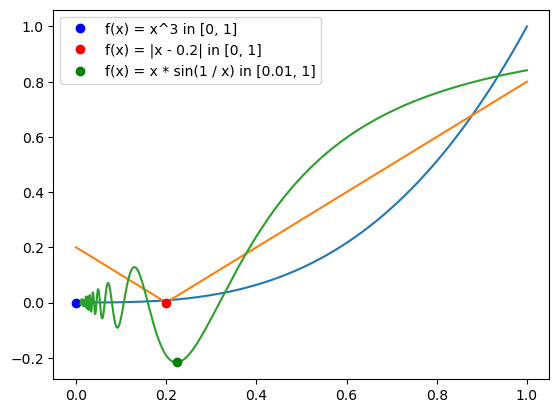

In [3]:
a = 0
b = 1
n = int((b - a) / 0.001) + 1
x_val = np.linspace(a, b, n)

f1 = lambda x: x ** 3
res_x, res_y = exhaustive_search(f1, a, b,)
plt.plot(x_val, f1(x_val))
plt.plot(res_x, res_y, 'bo', label='f(x) = x^3 in [0, 1]')

f2 = lambda x: abs(x - 0.2)
res_x, res_y = exhaustive_search(f2, a, b)
plt.plot(x_val, f2(x_val))
plt.plot(res_x, res_y, 'ro', label='f(x) = |x - 0.2| in [0, 1]')

a = 0.01
x_val = np.linspace(a, b, n)

f3 = lambda x: x * np.sin(1 / x)
res_x, res_y = exhaustive_search(f3, a, b)
plt.plot(x_val, f3(x_val))
plt.plot(res_x, res_y, 'go', label='f(x) = x * sin(1 / x) in [0.01, 1]')
plt.legend()

In [4]:
def dichotomy_search(f, a, b, epsilon=0.001, delta=1e-6):
    while (b - a) / 2 > epsilon:
        mid = (a + b) / 2
        left = mid - delta
        right = mid + delta
        if f(left) < f(right):
            b = right
        else:
            a = left
    min_x = (a + b) / 2
    min_f = f(min_x)
    return min_x, min_f

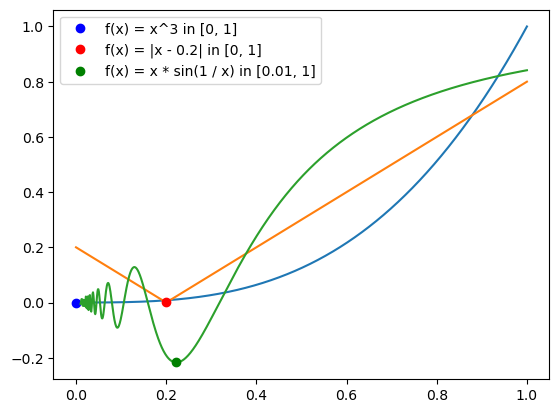

In [5]:
a = 0
n = int((b - a) / 0.001) + 1
x_val = np.linspace(a, b, n)

f1 = lambda x: x ** 3
res_x, res_y = dichotomy_search(f1, a, b,)
plt.plot(x_val, f1(x_val))
plt.plot(res_x, res_y, 'bo', label='f(x) = x^3 in [0, 1]')

f2 = lambda x: abs(x - 0.2)
res_x, res_y = dichotomy_search(f2, a, b)
plt.plot(x_val, f2(x_val))
plt.plot(res_x, res_y, 'ro', label='f(x) = |x - 0.2| in [0, 1]')

a = 0.01
x_val = np.linspace(a, b, n)

f3 = lambda x: x * np.sin(1 / x)
res_x, res_y = dichotomy_search(f3, a, b)
plt.plot(x_val, f3(x_val))
plt.plot(res_x, res_y, 'go', label='f(x) = x * sin(1 / x) in [0.01, 1]')
plt.legend()

In [6]:
def golden_section_search(f, a, b, epsilon=0.001):
    phi = (1 + 5 ** 0.5) / 2  # golden ratio
    resphi = 1 / phi

    # Initial points
    c = b - resphi * (b - a)
    d = a + resphi * (b - a)

    while abs(b - a) > epsilon:
        if f(c) < f(d):
            b = d
        else:
            a = c

        # Recalculate c and d within the new interval
        c = b - resphi * (b - a)
        d = a + resphi * (b - a)

    min_x = (a + b) / 2
    min_f = f(min_x)
    return min_x, min_f

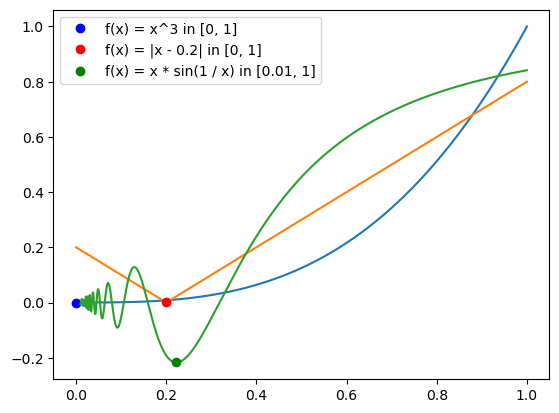

In [7]:
a = 0
n = int((b - a) / 0.001) + 1
x_val = np.linspace(a, b, n)

f1 = lambda x: x ** 3
res_x, res_y = golden_section_search(f1, a, b,)
plt.plot(x_val, f1(x_val))
plt.plot(res_x, res_y, 'bo', label='f(x) = x^3 in [0, 1]')

f2 = lambda x: abs(x - 0.2)
res_x, res_y = golden_section_search(f2, a, b)
plt.plot(x_val, f2(x_val))
plt.plot(res_x, res_y, 'ro', label='f(x) = |x - 0.2| in [0, 1]')

a = 0.01
x_val = np.linspace(a, b, n)

f3 = lambda x: x * np.sin(1 / x)
res_x, res_y = golden_section_search(f3, a, b)
plt.plot(x_val, f3(x_val))
plt.plot(res_x, res_y, 'go', label='f(x) = x * sin(1 / x) in [0.01, 1]')
plt.legend()

In [14]:
def nelder_mead(f, init_simplex, tol=1e-6, max_iter=500):
    """
     Nelder-Mead optimization algorithm
    :param f: function to minimize
    :param init_simplex: 
    :param tol: tolerance for convergence
    :param max_iter: 
    :return: 
    """
    n = len(init_simplex) - 1  # num of dims
    alpha, gamma, rho, sigma = 1.0, 2.0, 0.5, 0.5
    simplex = np.array(init_simplex) 
    f_values = np.array([f(vertex) for vertex in simplex])  # eval func at each vertex

    for num_iter in range(max_iter):
        indices = np.argsort(f_values)
        simplex = simplex[indices]
        f_values = f_values[indices]

        centroid = np.mean(simplex[:-1], axis=0)

        x_r = centroid + alpha * (centroid - simplex[-1])  # Reflect the worst point across the centroid
        f_r = f(x_r)
        
        if f_values[0] <= f_r < f_values[-2]:
            # then accept the reflected point
            simplex[-1] = x_r
            f_values[-1] = f_r
        elif f_r < f_values[0]:
            # expansion
            x_e = centroid + gamma * (x_r - centroid)
            f_e = f(x_e)
            if f_e < f_r:
                # then accept the expanded point
                simplex[-1] = x_e
                f_values[-1] = f_e
            else:
                # otherwise accept the reflected point
                simplex[-1] = x_r
                f_values[-1] = f_r
        else:
            # contraction
            x_c = centroid + rho * (simplex[-1] - centroid)
            f_c = f(x_c)
            if f_c < f_values[-1]:
                # Accept the contracted point
                simplex[-1] = x_c
                f_values[-1] = f_c
            else:
                # Shrink the simplex towards the best point
                simplex[1:] = simplex[0] + sigma * (simplex[1:] - simplex[0])
                f_values[1:] = np.array([f(vertex) for vertex in simplex[1:]])

        if np.std(f_values) < tol:
            break

    # best params are at the vertex with the lowest function value
    best_params = simplex[0]
    best_value = f_values[0]
    
    return best_params, best_value, num_iter


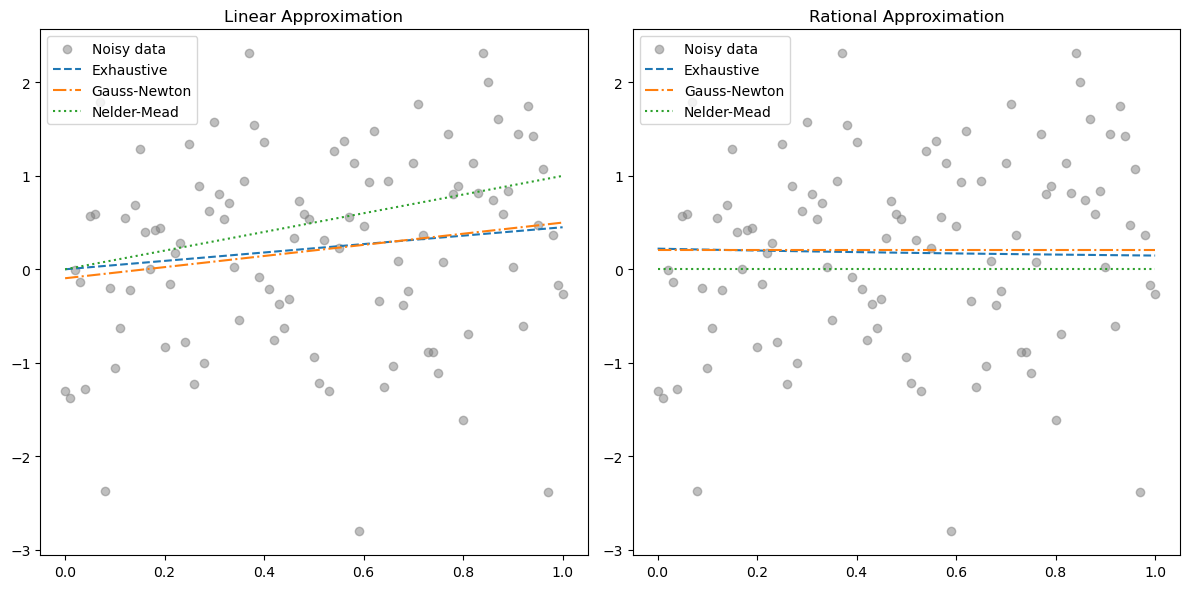

In [26]:
# Generate random alpha and beta in (0,1)
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

# Generate data with noise
k_values = np.arange(101)
x_values = k_values / 100
delta_values = np.random.normal(0, 1, len(x_values))
y_values = alpha * x_values + beta + delta_values

def loss_linear(params, x, y):
    """
    Linear loss function for minimization
    :param params: 
    :param x: 
    :param y: 
    :return: 
    """
    a, b = params
    y_pred = a * x + b
    return np.sum((y_pred - y) ** 2)

def loss_rational(params, x, y, offset=1e-8):
    a, b = params
    y_pred = a / (x + b + offset)
    return np.sum((y_pred - y) ** 2)

def exhaustive_search_linear(x, y, a_range=(0, 2), b_range=(0, 2), epsilon=0.01):
    """
    Exhaustive search to find optimal a & b params for a linear model.
    The linear model is defined as: F(x, a, b) = a * x + b
    :param x: independent data points
    :param y: 
    :param a_range: (min, max) for a parameter
    :param b_range: 
    :param epsilon: step size for grid search
    :return: 
    """
    min_loss = float('inf')
    best_a, best_b = None, None
    for a in np.arange(a_range[0], a_range[1], epsilon):
        for b in np.arange(b_range[0], b_range[1], epsilon):
            loss = loss_linear([a, b], x, y)
            if loss < min_loss:
                min_loss = loss
                best_a, best_b = a, b
    return best_a, best_b, min_loss

def exhaustive_search_rational(x, y, a_range=(0, 2), b_range=(0, 2), epsilon=0.01):
    """
    Exhaustive Search (Rational)  
    :param x: 
    :param y: 
    :param a_range: 
    :param b_range: 
    :param epsilon: 
    :return: 
    """
    min_loss = float('inf')
    best_a, best_b = None, None
    for a in np.arange(a_range[0], a_range[1], epsilon):
        for b in np.arange(b_range[0], b_range[1], epsilon):
            loss = loss_rational([a, b], x, y)
            if loss < min_loss:
                min_loss = loss
                best_a, best_b = a, b
    return best_a, best_b, min_loss

# Gauss-Newton method for linear
# scipy.optimize `least_squares` function attempts to minimize the sum of squared residuals
initial_guess = [0.5, 0.5]
result_linear_gn = least_squares(lambda params: (params[0] * x_values + params[1]) - y_values, initial_guess)

# Gauss-Newton method for rational
result_rational_gn = least_squares(lambda params: (params[0] / (x_values + params[1])) - y_values, initial_guess)

# Nelder-Mead for linear model
initial_simplex = [[1, 1], [2, 1], [1, 2]]  # Initial simplex for parameters (a, b)
best_params_nm_linear, best_value_nm_linear, num_iter_nm_linear = nelder_mead(
    lambda params: loss_linear(params, x_values, y_values), initial_simplex
)

# Nelder-Mead for rational model
best_params_nm_rational, best_value_nm_rational, num_iter_nm_rational = nelder_mead(
    lambda params: loss_rational(params, x_values, y_values), initial_simplex
)

# exhaustive search
best_a_linear, best_b_linear, min_loss_linear = exhaustive_search_linear(x_values, y_values)
best_a_rational, best_b_rational, min_loss_rational = exhaustive_search_rational(x_values, y_values)

# predicts
y_pred_linear_exhaustive = best_a_linear * x_values + best_b_linear
y_pred_rational_exhaustive = best_a_rational / (x_values + best_b_rational)

y_pred_linear_gn = result_linear_gn.x[0] * x_values + result_linear_gn.x[1]
y_pred_rational_gn = result_rational_gn.x[0] / (x_values + result_rational_gn.x[1])

# Nelder-Mead predictions for Linear and Rational models using optimized parameters
y_pred_linear_nm = best_params_nm_linear[0] * x_values + best_params_nm_linear[1]
y_pred_rational_nm = best_params_nm_rational[0] / (x_values + best_params_nm_rational[1] + 1e-8)

plt.figure(figsize=(12, 6))

# linear approximant
plt.subplot(1, 2, 1)
plt.scatter(x_values, y_values, label="Noisy data", color='gray', alpha=0.5)
plt.plot(x_values, y_pred_linear_exhaustive, label="Exhaustive", linestyle="--")
plt.plot(x_values, y_pred_linear_gn, label="Gauss-Newton", linestyle="-.")
plt.plot(x_values, y_pred_linear_nm, label="Nelder-Mead", linestyle=":")
plt.title("Linear Approximation")
plt.legend()

# rational approximant
plt.subplot(1, 2, 2)
plt.scatter(x_values, y_values, label="Noisy data", color='gray', alpha=0.5)
plt.plot(x_values, y_pred_rational_exhaustive, label="Exhaustive", linestyle="--")
plt.plot(x_values, y_pred_rational_gn, label="Gauss-Newton", linestyle="-.")
plt.plot(x_values, y_pred_rational_nm, label="Nelder-Mead", linestyle=":")
plt.title("Rational Approximation")
plt.legend()

plt.tight_layout()

### summary: 

Exhaustive search is reliable in identifying function minimum but inefficient for larger or more complex parameter spaces. Given the step size, the number of iterations is determined by the total number of grid points. For example, with a step size of 0.01 in each parameter over an interval of [0, 2], the number of evaluations is quite high, around 40000 evaluations.

Gauss-Newton is efficient, often requiring only a small number of iterations to converge (typically between 5-10 iterations) due to its quadratic convergence properties when close to the minimum.

Nelder-Mead tends to provide good approximations and performs better than Gauss-Newton for non-linear functions. 
